In [20]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [30]:
dir = "p_date=2022-12-26-16_39_15"

In [31]:
path = f'../../output/weights/{dir}/log.json'
#path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

46001 records
dict_keys(['loss', 'mae', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [32]:
slice = 100_000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss) + 100000
loss_filtered = { k: v for k, v in enumerate(loss) if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [33]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 1_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.hlines(y=0, xmin=0, xmax=max(data.keys()), linewidth=2, color='purple')
    
    plt.title(title)
    
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    #print(f"Moving Average (simple): {moving_average}")
    print()
    #print(f"Moving Average: {percent_list}")
    print("Values: " + " > ".join(map(str, moving_average.values())))
    print()
    
    print(f"Minimum (last {interval}): {min(list(data.values())[:-interval])}")
    print(f"Average (last {interval}): {np.mean(list(data.values())[:-interval])}")
    print(f"Maximum (last {interval}): {max(list(data.values())[:-interval])}")

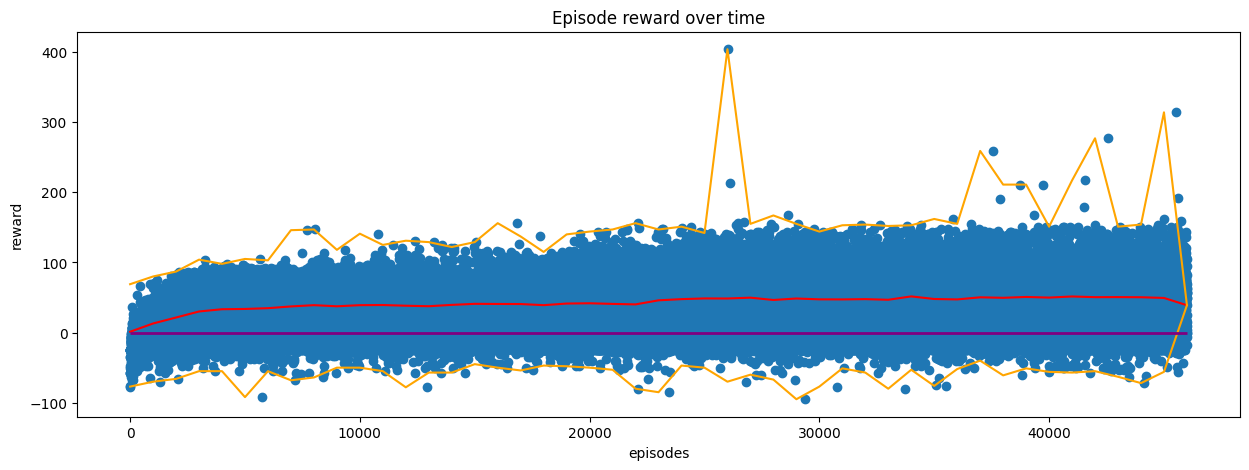

Maximum: 404.0
Average: 41.874676637464404

Values: 1.2 > 13.0 > 21.5 > 30.1 > 33.3 > 33.7 > 34.8 > 37.3 > 39.1 > 37.5 > 39.1 > 39.3 > 38.3 > 37.6 > 39.5 > 41.0 > 40.8 > 40.7 > 39.1 > 41.4 > 41.8 > 40.9 > 40.2 > 46.0 > 47.7 > 48.7 > 48.6 > 49.8 > 46.5 > 48.6 > 47.4 > 47.3 > 47.7 > 46.8 > 51.6 > 47.9 > 47.3 > 50.3 > 49.6 > 50.8 > 49.9 > 51.5 > 50.5 > 50.6 > 50.4 > 49.4 > 39.0

Minimum (last 1000): -95.0
Average (last 1000): 41.70736205862092
Maximum (last 1000): 404.0


In [34]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

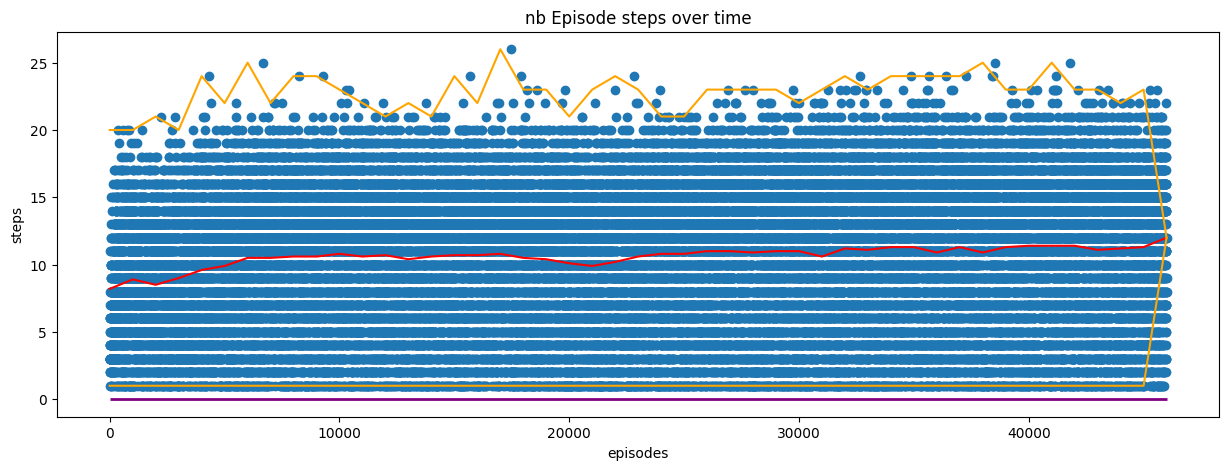

Maximum: 26
Average: 10.593878393947957

Values: 8.2 > 8.9 > 8.5 > 9.0 > 9.6 > 9.9 > 10.5 > 10.5 > 10.6 > 10.6 > 10.8 > 10.6 > 10.7 > 10.4 > 10.6 > 10.7 > 10.7 > 10.8 > 10.5 > 10.4 > 10.1 > 9.9 > 10.2 > 10.6 > 10.8 > 10.8 > 11.0 > 11.0 > 10.9 > 11.0 > 11.0 > 10.6 > 11.2 > 11.1 > 11.3 > 11.3 > 10.9 > 11.3 > 10.9 > 11.3 > 11.4 > 11.4 > 11.4 > 11.1 > 11.2 > 11.3 > 12

Minimum (last 1000): 1
Average (last 1000): 10.577276060531988
Maximum (last 1000): 26


In [35]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

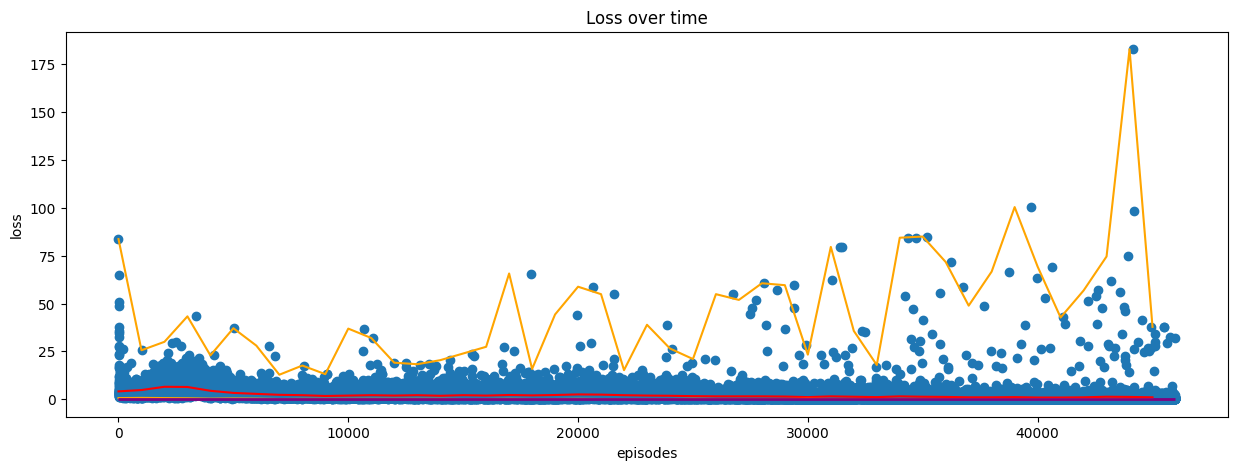

Maximum: 182.88299560546875
Average: 2.0672183065779217

Values: 4.1 > 4.8 > 6.5 > 6.4 > 4.4 > 3.3 > 2.8 > 2.3 > 2.1 > 1.7 > 1.9 > 2.1 > 1.9 > 2.1 > 1.8 > 2.1 > 1.9 > 2.2 > 2.0 > 2.2 > 2.5 > 2.4 > 2.1 > 1.9 > 1.8 > 1.6 > 1.5 > 1.5 > 1.5 > 1.4 > 1.1 > 1.5 > 1.3 > 1.1 > 1.5 > 1.3 > 1.2 > 1.0 > 1.0 > 1.1 > 0.9 > 0.9 > 1.0 > 1.3 > 1.2 > 1.0

Minimum (last 1000): 0.06189720705151558
Average (last 1000): 2.0908532999548664
Maximum (last 1000): 182.88299560546875


In [36]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

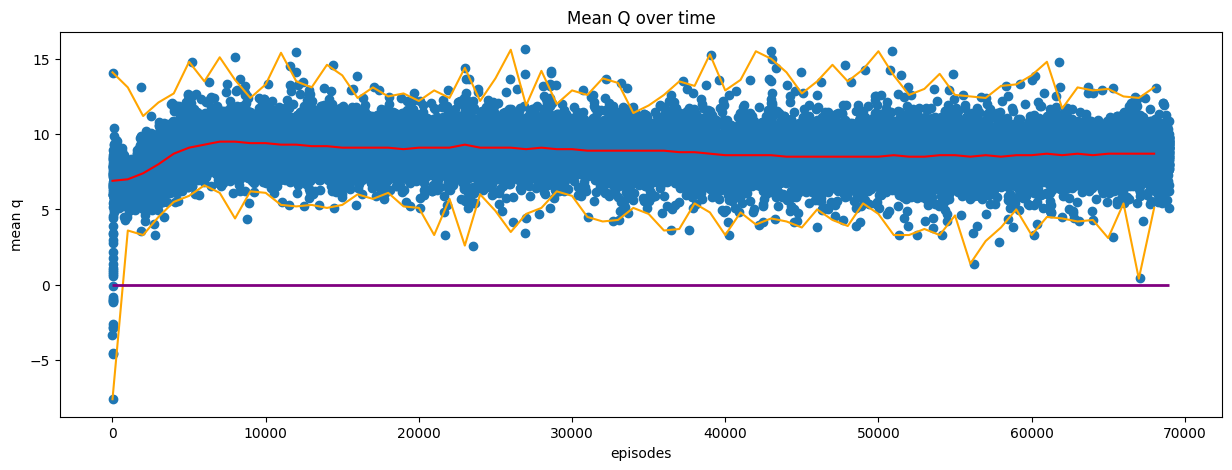

Maximum: 15.6348295211792
Average: 8.76781494551126

Values: 6.9 > 7.0 > 7.4 > 8.0 > 8.7 > 9.1 > 9.3 > 9.5 > 9.5 > 9.4 > 9.4 > 9.3 > 9.3 > 9.2 > 9.2 > 9.1 > 9.1 > 9.1 > 9.1 > 9.0 > 9.1 > 9.1 > 9.1 > 9.3 > 9.1 > 9.1 > 9.1 > 9.0 > 9.1 > 9.0 > 9.0 > 8.9 > 8.9 > 8.9 > 8.9 > 8.9 > 8.9 > 8.8 > 8.8 > 8.7 > 8.6 > 8.6 > 8.6 > 8.6 > 8.5 > 8.5 > 8.5 > 8.5 > 8.5 > 8.5 > 8.5 > 8.6 > 8.5 > 8.5 > 8.6 > 8.6 > 8.5 > 8.6 > 8.5 > 8.6 > 8.6 > 8.7 > 8.6 > 8.7 > 8.6 > 8.7 > 8.7 > 8.7 > 8.7

Minimum (last 1000): -7.560598850250244
Average (last 1000): 8.768117264755292
Maximum (last 1000): 15.6348295211792


In [28]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

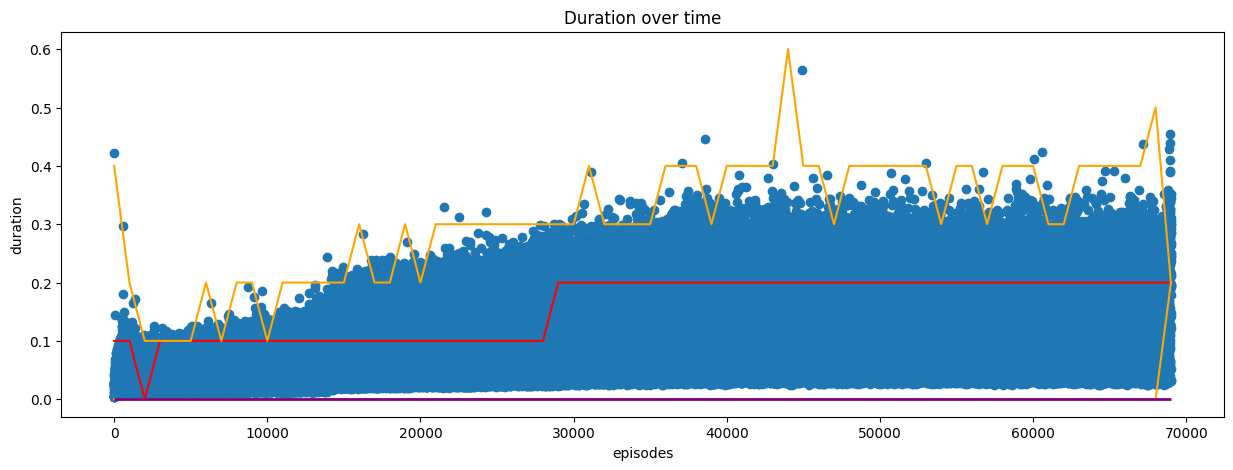

Maximum: 0.5639468999997916
Average: 0.13818878274952368

Values: 0.1 > 0.1 > 0.0 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.1 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2 > 0.2

Minimum (last 1000): 0.0030196000000004553
Average (last 1000): 0.13763609482948586
Maximum (last 1000): 0.5639468999997916


In [29]:
plot(duration, "Duration over time", "episodes", "duration")